
```
# Aim : To early Predict/Forecast Seizures occuring before 10 seconds / 2 windows.

# Original dataset Link : https://zenodo.org/records/2547147 , Max ram needed: 16 Gb, please connect to normal "CPU instance" in runtime option.

#Date of final code formatted: Dec-17th 2024 , Tuesday

# Dataset citation :
[1] Nathan Stevenson, Karoliina Tapani, Leena Lauronenand Sampsa Vanhatalo, “A dataset of neonatal EEG recordings with seizures annotations”. Zenodo, Jun. 05, 2018. doi: 10.5281/zenodo.2547147.


```



### Installation of recommedned libraries to run all these  code cells


In [8]:
!pip install mne PyWavelets deap matplotlib scikit-learn tensorflow numpy pandas mne scaleogram

### Retrieve all Dataset files  form  Dropbox  using wget command exactly below

In [9]:
!wget --content-disposition "https://www.dropbox.com/scl/fi/2pjx9xfu4qdj39s6jxar2/neonatal-data.zip?rlkey=jkzv7e35rnswkac6f2cjqaedf&st=vl022ot1&dl=1" -O /content/neonatal-data.zip



--2024-12-17 22:51:26--  https://www.dropbox.com/scl/fi/2pjx9xfu4qdj39s6jxar2/neonatal-data.zip?rlkey=jkzv7e35rnswkac6f2cjqaedf&st=vl022ot1&dl=1
Resolving www.dropbox.com (www.dropbox.com)... 162.125.3.18, 2620:100:6018:18::a27d:312
Connecting to www.dropbox.com (www.dropbox.com)|162.125.3.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://ucee919ee11825f312cc3f1e98a2.dl.dropboxusercontent.com/cd/0/inline/CgcvqFR0DCgB4jO--WW46mtDinrIJwejcidjPW3_Eqs3wOX7HdOmViPGyNS_Cm4llW9WiZDVKhCCY0uLX6vDLg4Awb-D88natO-az5BwILCBQphIDoweKVZekFv8SJ7_693rEYYlrjVe_p8Wb6agoxIH/file?dl=1# [following]
--2024-12-17 22:51:27--  https://ucee919ee11825f312cc3f1e98a2.dl.dropboxusercontent.com/cd/0/inline/CgcvqFR0DCgB4jO--WW46mtDinrIJwejcidjPW3_Eqs3wOX7HdOmViPGyNS_Cm4llW9WiZDVKhCCY0uLX6vDLg4Awb-D88natO-az5BwILCBQphIDoweKVZekFv8SJ7_693rEYYlrjVe_p8Wb6agoxIH/file?dl=1
Resolving ucee919ee11825f312cc3f1e98a2.dl.dropboxusercontent.com (ucee919ee11825f312cc3f1e98a2.dl.dropboxusercont

###  Unzip files with below command.

In [11]:
!unzip neonatal-data.zip

Archive:  neonatal-data.zip
   creating: neonatal-data/
  inflating: neonatal-data/annotations_2017.mat  
  inflating: neonatal-data/annotations_2017_A.csv  
  inflating: neonatal-data/annotations_2017_B.csv  
  inflating: neonatal-data/annotations_2017_C.csv  
  inflating: neonatal-data/clinical_information.csv  
  inflating: neonatal-data/eeg11.edf  
  inflating: neonatal-data/eeg13.edf  
  inflating: neonatal-data/eeg14.edf  
  inflating: neonatal-data/eeg15.edf  
  inflating: neonatal-data/eeg16.edf  
  inflating: neonatal-data/eeg17.edf  
  inflating: neonatal-data/eeg19.edf  
  inflating: neonatal-data/eeg2.edf  
  inflating: neonatal-data/eeg20.edf  
  inflating: neonatal-data/eeg21.edf  
  inflating: neonatal-data/eeg22.edf  
  inflating: neonatal-data/eeg23.edf  
  inflating: neonatal-data/eeg3.edf  
  inflating: neonatal-data/eeg31.edf  
  inflating: neonatal-data/eeg33.edf  
  inflating: neonatal-data/eeg34.edf  
  inflating: neonatal-data/eeg36.edf  
  inflating: neonatal-d

In [12]:
ls

neonatal-data/  neonatal-data.zip  sample_data/


In [13]:
#To check if files are in content (Note:This will stay temporary in your Collab space , if you want to start fresh upon session exit  , need to execute all steps from beginning onwards)
import os

data_dir = "/content/neonatal-data"
print("Files in directory:", os.listdir(data_dir))

Files in directory: ['eeg4.edf', 'eeg39.edf', 'eeg75.edf', 'eeg77.edf', 'eeg9.edf', 'eeg19.edf', 'eeg7.edf', 'eeg73.edf', 'eeg17.edf', 'annotations_2017_A.csv', 'eeg11.edf', 'eeg40.edf', 'eeg13.edf', 'eeg38.edf', 'eeg41.edf', 'eeg36.edf', 'eeg3.edf', 'eeg5.edf', 'eeg54.edf', 'eeg51.edf', 'eeg44.edf', 'eeg22.edf', 'eeg52.edf', 'eeg76.edf', 'eeg79.edf', 'eeg20.edf', 'eeg23.edf', 'eeg33.edf', 'eeg69.edf', 'eeg15.edf', 'eeg78.edf', 'eeg34.edf', 'eeg21.edf', 'clinical_information.csv', 'eeg68.edf', 'eeg47.edf', 'eeg67.edf', 'eeg14.edf', 'annotations_2017.mat', 'eeg71.edf', 'eeg50.edf', 'eeg66.edf', 'eeg31.edf', 'eeg2.edf', 'annotations_2017_C.csv', 'annotations_2017_B.csv', 'eeg16.edf', 'eeg63.edf', 'eeg8.edf']


In [14]:
#Moving all files to eeg Folder

import os
import shutil

# Define source and target directories
source_dir = "/content/neonatal-data"  # Directory containing all files
target_dir = "/content/eeg"            # New 'eeg' folder in /content

# Create the target directory if it does not exist
os.makedirs(target_dir, exist_ok=True)
print(f"Target directory created (if it didn't exist): {target_dir}")

# List all files in the source directory (no filtering)
all_files = os.listdir(source_dir)
print(f"Found {len(all_files)} files to move.")

# Move all files to the target directory
for file in all_files:
    src_file = os.path.join(source_dir, file)
    dst_file = os.path.join(target_dir, file)
    shutil.move(src_file, dst_file)
    print(f"Moved: {file} -> {target_dir}")

print(f"\nAll files have been moved to: {target_dir}")



Target directory created (if it didn't exist): /content/eeg
Found 49 files to move.
Moved: eeg4.edf -> /content/eeg
Moved: eeg39.edf -> /content/eeg
Moved: eeg75.edf -> /content/eeg
Moved: eeg77.edf -> /content/eeg
Moved: eeg9.edf -> /content/eeg
Moved: eeg19.edf -> /content/eeg
Moved: eeg7.edf -> /content/eeg
Moved: eeg73.edf -> /content/eeg
Moved: eeg17.edf -> /content/eeg
Moved: annotations_2017_A.csv -> /content/eeg
Moved: eeg11.edf -> /content/eeg
Moved: eeg40.edf -> /content/eeg
Moved: eeg13.edf -> /content/eeg
Moved: eeg38.edf -> /content/eeg
Moved: eeg41.edf -> /content/eeg
Moved: eeg36.edf -> /content/eeg
Moved: eeg3.edf -> /content/eeg
Moved: eeg5.edf -> /content/eeg
Moved: eeg54.edf -> /content/eeg
Moved: eeg51.edf -> /content/eeg
Moved: eeg44.edf -> /content/eeg
Moved: eeg22.edf -> /content/eeg
Moved: eeg52.edf -> /content/eeg
Moved: eeg76.edf -> /content/eeg
Moved: eeg79.edf -> /content/eeg
Moved: eeg20.edf -> /content/eeg
Moved: eeg23.edf -> /content/eeg
Moved: eeg33.edf 

### Load valid .edf  files containing eeg data from 44 Neonates out of 79 neonates.

> Segmented every 5 seconds of data across 18 channels till duration of entire signals per subject/neonate
>
> Resampled Samplinf frequency from 256 Hz  to 64 Hz for computational efficency.
>
> Takes some time to process, please wait untill cell execution completes.




In [16]:
#pre-processing eeg , with  segmentation

import os
import mne
import re
import warnings
import numpy as np
import pandas as pd

warnings.filterwarnings('ignore')

# Define the directory and file parameters
data_dir = "/content/eeg"
file_prefix = "eeg"
file_suffix = ".edf"

# List of EDF files to exclude
excluded_files = ["edf1.edf", "edf62.edf", "edf25.edf", "edf6.edf", "edf10.edf", "edf12.edf", "edf18.edf", "edf24.edf", "edf26.edf", "edf27.edf", "edf28.edf", "edf29.edf", "edf30.edf",
                 "edf32.edf", "edf35.edf", "edf37.edf", "edf42.edf", "edf43.edf", "edf45.edf", "edf46.edf", "edf48.edf", "edf49.edf", "edf53.edf", "edf55.edf", "edf56.edf", "edf57.edf",
                 "edf58.edf", "edf59.edf", "edf60.edf", "edf61.edf", "edf64.edf", "edf65.edf", "edf70.edf", "edf72.edf", "edf74.edf"
                ]

# List to hold the loaded raw objects
raw_list = []

# Regular expression for detecting ECG, EKG, and Resp Effort channels (case insensitive)
drop_channels_regex = re.compile(r'.*(ECG\s*EKG|Resp\s*Effort).*', re.IGNORECASE)

# Manual channel renaming dictionary
manual_replacements = {
    'EEG Fp1-Ref': 'Fp1', 'EEG Fp2-Ref': 'Fp2', 'EEG F7-Ref': 'F7', 'EEG F3-Ref': 'F3',
    'EEG Fz-Ref': 'Fz', 'EEG F4-Ref': 'F4', 'EEG F8-Ref': 'F8',
    'EEG T3-Ref': 'T3', 'EEG C3-Ref': 'C3', 'EEG Cz-Ref': 'Cz', 'EEG C4-Ref': 'C4', 'EEG T4-Ref': 'T4', 'EEG T5-Ref': 'T5',
    'EEG P3-Ref': 'P3', 'EEG Pz-Ref': 'Pz', 'EEG P4-Ref': 'P4', 'EEG T6-Ref': 'T6', 'EEG O1-Ref': 'O1', 'EEG O2-Ref': 'O2',
    'EEG Fp1-REF': 'Fp1', 'EEG Fp2-REF': 'Fp2', 'EEG F7-REF': 'F7', 'EEG F3-REF': 'F3',
    'EEG Fz-REF': 'Fz', 'EEG F4-REF': 'F4', 'EEG F8-REF': 'F8',
    'EEG T3-REF': 'T3', 'EEG C3-REF': 'C3', 'EEG Cz-REF': 'Cz', 'EEG C4-REF': 'C4', 'EEG T4-REF': 'T4', 'EEG T5-REF': 'T5',
    'EEG P3-REF': 'P3', 'EEG Pz-REF': 'Pz', 'EEG P4-REF': 'P4', 'EEG T6-REF': 'T6', 'EEG O1-REF': 'O1', 'EEG O2-REF': 'O2',
}

# Dictionary to store segmented data for each subject
segmented_data = {}

# Iterate through the files in the specified directory
for filename in os.listdir(data_dir):
    if filename.startswith(file_prefix) and filename.endswith(file_suffix):
        # Check if the file is in the excluded list
        if filename in excluded_files:
            print(f"Skipping excluded file: {filename}")
            continue

        # Construct the full file path
        file_path = os.path.join(data_dir, filename)

        try:
            # Load the EDF file
            raw = mne.io.read_raw_edf(file_path, preload=True)
            print(f"Successfully loaded: {filename}")

            # Drop unwanted channels
            existing_channels_to_drop = [ch for ch in raw.ch_names if drop_channels_regex.match(ch)]
            if existing_channels_to_drop:
                raw.drop_channels(existing_channels_to_drop)
                print(f"Dropped channels {existing_channels_to_drop} for {filename}")

            # Rename channels
            raw.rename_channels({ch: manual_replacements.get(ch, ch) for ch in raw.ch_names})
            print(f"Updated channel names for {filename}: {raw.ch_names}")

            # Apply filters
            raw.filter(l_freq=0.5, h_freq=30.0, fir_design='firwin')
            raw.notch_filter(freqs=50, fir_design='firwin')
            print(f"Applied filters for {filename}")

            # Re-reference to Cz
            if 'Cz' in raw.ch_names:
                raw.set_eeg_reference(ref_channels=['Cz'], projection=False)
                print(f"Re-referenced to Cz for {filename}")
            else:
                print(f"Cz channel not found in {filename}. Cannot re-reference.")

            # Resample to 64 Hz
            target_sfreq = 64
            if raw.info['sfreq'] != target_sfreq:
                raw.resample(target_sfreq)
                print(f"Resampled {filename} to {target_sfreq} Hz.")

            # Remove Cz channel
            if 'Cz' in raw.ch_names:
                raw.drop_channels(['Cz'])
                print(f"Removed 'Cz' channel for {filename}")

            # Check for 18 channels
            if len(raw.ch_names) == 18:
                # Segment the data into 5-second windows
                sfreq = raw.info['sfreq']
                window_size = int(5 * sfreq)  # 5 seconds
                num_windows = int(raw.times[-1] / 5)

                segmented_data[filename] = []
                for i in range(num_windows):
                    start_time = i * 5
                    end_time = (i + 1) * 5
                    start_idx = int(start_time * sfreq)
                    end_idx = int(end_time * sfreq)
                    window_data = raw.get_data(start=start_idx, stop=end_idx)
                    segmented_data[filename].append(window_data)

                print(f"Segmented {filename} into {num_windows} windows.")
            else:
                print(f"Incorrect number of channels for {filename}, expected 18 but found {len(raw.ch_names)}.")

        except Exception as e:
            print(f"Error processing {filename}: {e}")

# Summary of loaded files
print(f"Loaded and processed {len(segmented_data)} EDF files into segmented_data.")

# Example of how to save the segmented data to a file
for filename, data in segmented_data.items():
    np.save(f"{filename}_segmented.npy", data)
    print(f"Saved segmented data for {filename} to file.")


Extracting EDF parameters from /content/eeg/eeg4.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 876799  =      0.000 ...  3424.996 secs...
Successfully loaded: eeg4.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg4.edf
Updated channel names for eeg4.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz', 'C3', 'C4', 'Cz', 'T3', 'T5', 'T4', 'T6', 'P3', 'P4', 'Pz', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passband edge: 30.00 Hz
- Upper transition bandwidth: 7.50 Hz (-6 dB cutoff frequency: 33.75 Hz)
- Filter length: 1691 samples (6.605 s)

F

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Applied filters for eeg4.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Re-referenced to Cz for eeg4.edf
Resampled eeg4.edf to 64 Hz.
Removed 'Cz' channel for eeg4.edf
Segmented eeg4.edf into 684 windows.
Extracting EDF parameters from /content/eeg/eeg39.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1185023  =      0.000 ...  4628.996 secs...
Successfully loaded: eeg39.edf
Dropped channels ['ECG EKG-REF', 'Resp Effort-REF'] for eeg39.edf
Updated channel names for eeg39.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)

Applied filters for eeg39.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Re-referenced to Cz for eeg39.edf
Resampled eeg39.edf to 64 Hz.
Removed 'Cz' channel for eeg39.edf
Segmented eeg39.edf into 925 windows.
Extracting EDF parameters from /content/eeg/eeg75.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1012479  =      0.000 ...  3954.996 secs...
Successfully loaded: eeg75.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg75.edf
Updated channel names for eeg75.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz', 'C3', 'C4', 'Cz', 'T3', 'T5', 'T4', 'T6', 'P3', 'P4', 'Pz', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Applied filters for eeg75.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Re-referenced to Cz for eeg75.edf
Resampled eeg75.edf to 64 Hz.
Removed 'Cz' channel for eeg75.edf
Segmented eeg75.edf into 790 windows.
Extracting EDF parameters from /content/eeg/eeg77.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1073407  =      0.000 ...  4192.996 secs...
Successfully loaded: eeg77.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg77.edf
Updated channel names for eeg77.edf: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.9s


Applied filters for eeg77.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Re-referenced to Cz for eeg77.edf
Resampled eeg77.edf to 64 Hz.
Removed 'Cz' channel for eeg77.edf
Segmented eeg77.edf into 838 windows.
Extracting EDF parameters from /content/eeg/eeg9.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 908799  =      0.000 ...  3549.996 secs...
Successfully loaded: eeg9.edf
Dropped channels ['ECG EKG-REF', 'Resp Effort-REF'] for eeg9.edf
Updated channel names for eeg9.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband a

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


Applied filters for eeg9.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Re-referenced to Cz for eeg9.edf
Resampled eeg9.edf to 64 Hz.
Removed 'Cz' channel for eeg9.edf
Segmented eeg9.edf into 709 windows.
Extracting EDF parameters from /content/eeg/eeg19.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2305535  =      0.000 ...  9005.996 secs...
Successfully loaded: eeg19.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg19.edf
Updated channel names for eeg19.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz', 'C3', 'C4', 'Cz', 'T3', 'T5', 'T4', 'T6', 'P3', 'P4', 'Pz', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuati

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    4.1s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


Applied filters for eeg19.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Re-referenced to Cz for eeg19.edf
Resampled eeg19.edf to 64 Hz.
Removed 'Cz' channel for eeg19.edf
Segmented eeg19.edf into 1801 windows.
Extracting EDF parameters from /content/eeg/eeg7.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 935423  =      0.000 ...  3653.996 secs...
Successfully loaded: eeg7.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg7.edf
Updated channel names for eeg7.edf: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuat

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Applied filters for eeg7.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Re-referenced to Cz for eeg7.edf
Resampled eeg7.edf to 64 Hz.
Removed 'Cz' channel for eeg7.edf
Segmented eeg7.edf into 730 windows.
Extracting EDF parameters from /content/eeg/eeg73.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 954879  =      0.000 ...  3729.996 secs...
Successfully loaded: eeg73.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg73.edf
Updated channel names for eeg73.edf: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper pa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Applied filters for eeg73.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Re-referenced to Cz for eeg73.edf
Resampled eeg73.edf to 64 Hz.
Removed 'Cz' channel for eeg73.edf
Segmented eeg73.edf into 745 windows.
Extracting EDF parameters from /content/eeg/eeg17.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1406207  =      0.000 ...  5492.996 secs...
Successfully loaded: eeg17.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg17.edf
Updated channel names for eeg17.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz', 'C3', 'C4', 'Cz', 'T3', 'T5', 'T4', 'T6', 'P3', 'P4', 'Pz', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


Applied filters for eeg17.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Re-referenced to Cz for eeg17.edf
Resampled eeg17.edf to 64 Hz.
Removed 'Cz' channel for eeg17.edf
Segmented eeg17.edf into 1098 windows.
Extracting EDF parameters from /content/eeg/eeg11.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1916927  =      0.000 ...  7487.996 secs...
Successfully loaded: eeg11.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg11.edf
Updated channel names for eeg11.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz', 'C3', 'C4', 'Cz', 'T3', 'T5', 'T4', 'T6', 'P3', 'P4', 'Pz', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband att

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)

Applied filters for eeg11.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Re-referenced to Cz for eeg11.edf
Resampled eeg11.edf to 64 Hz.
Removed 'Cz' channel for eeg11.edf
Segmented eeg11.edf into 1497 windows.
Extracting EDF parameters from /content/eeg/eeg40.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1494271  =      0.000 ...  5836.996 secs...
Successfully loaded: eeg40.edf
Dropped channels ['ECG EKG-REF', 'Resp Effort-REF'] for eeg40.edf
Updated channel names for eeg40.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.5s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Applied filters for eeg40.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Re-referenced to Cz for eeg40.edf
Resampled eeg40.edf to 64 Hz.
Removed 'Cz' channel for eeg40.edf
Segmented eeg40.edf into 1167 windows.
Extracting EDF parameters from /content/eeg/eeg13.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 3946495  =      0.000 ... 15415.996 secs...
Successfully loaded: eeg13.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg13.edf
Updated channel names for eeg13.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz', 'C3', 'C4', 'Cz', 'T3', 'T5', 'T4', 'T6', 'P3', 'P4', 'Pz', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband att

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    5.4s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    4.5s


Applied filters for eeg13.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Re-referenced to Cz for eeg13.edf
Resampled eeg13.edf to 64 Hz.
Removed 'Cz' channel for eeg13.edf
Segmented eeg13.edf into 3083 windows.
Extracting EDF parameters from /content/eeg/eeg38.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1560319  =      0.000 ...  6094.996 secs...
Successfully loaded: eeg38.edf
Dropped channels ['ECG EKG-REF', 'Resp Effort-REF'] for eeg38.edf
Updated channel names for eeg38.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stop

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Applied filters for eeg38.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Re-referenced to Cz for eeg38.edf
Resampled eeg38.edf to 64 Hz.
Removed 'Cz' channel for eeg38.edf
Segmented eeg38.edf into 1218 windows.
Extracting EDF parameters from /content/eeg/eeg41.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2479103  =      0.000 ...  9683.996 secs...
Successfully loaded: eeg41.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg41.edf
Updated channel names for eeg41.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz', 'C3', 'C4', 'Cz', 'T3', 'T5', 'T4', 'T6', 'P3', 'P4', 'Pz', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband att

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.2s


Applied filters for eeg41.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Re-referenced to Cz for eeg41.edf
Resampled eeg41.edf to 64 Hz.
Removed 'Cz' channel for eeg41.edf
Segmented eeg41.edf into 1936 windows.
Extracting EDF parameters from /content/eeg/eeg36.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1300991  =      0.000 ...  5081.996 secs...
Successfully loaded: eeg36.edf
Dropped channels ['ECG EKG-REF', 'Resp Effort-REF'] for eeg36.edf
Updated channel names for eeg36.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stop

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s



FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.2s


Applied filters for eeg36.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Re-referenced to Cz for eeg36.edf
Resampled eeg36.edf to 64 Hz.
Removed 'Cz' channel for eeg36.edf
Segmented eeg36.edf into 1016 windows.
Extracting EDF parameters from /content/eeg/eeg3.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1129471  =      0.000 ...  4411.996 secs...
Successfully loaded: eeg3.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg3.edf
Updated channel names for eeg3.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz', 'C3', 'C4', 'Cz', 'T3', 'T5', 'T4', 'T6', 'P3', 'P4', 'Pz', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenua

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Applied filters for eeg3.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Re-referenced to Cz for eeg3.edf
Resampled eeg3.edf to 64 Hz.
Removed 'Cz' channel for eeg3.edf
Segmented eeg3.edf into 882 windows.
Extracting EDF parameters from /content/eeg/eeg5.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 983295  =      0.000 ...  3840.996 secs...
Successfully loaded: eeg5.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg5.edf
Updated channel names for eeg5.edf: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper passba

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Applied filters for eeg5.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Re-referenced to Cz for eeg5.edf
Resampled eeg5.edf to 64 Hz.
Removed 'Cz' channel for eeg5.edf
Segmented eeg5.edf into 768 windows.
Extracting EDF parameters from /content/eeg/eeg54.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1112063  =      0.000 ...  4343.996 secs...
Successfully loaded: eeg54.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg54.edf
Updated channel names for eeg54.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz', 'C3', 'C4', 'Cz', 'T3', 'T5', 'T4', 'T6', 'P3', 'P4', 'Pz', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.1s


Applied filters for eeg54.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Re-referenced to Cz for eeg54.edf
Resampled eeg54.edf to 64 Hz.
Removed 'Cz' channel for eeg54.edf
Segmented eeg54.edf into 868 windows.
Extracting EDF parameters from /content/eeg/eeg51.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1203455  =      0.000 ...  4700.996 secs...
Successfully loaded: eeg51.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg51.edf
Updated channel names for eeg51.edf: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)

Applied filters for eeg51.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Re-referenced to Cz for eeg51.edf
Resampled eeg51.edf to 64 Hz.
Removed 'Cz' channel for eeg51.edf
Segmented eeg51.edf into 940 windows.
Extracting EDF parameters from /content/eeg/eeg44.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 860159  =      0.000 ...  3359.996 secs...
Successfully loaded: eeg44.edf
Dropped channels ['ECG EKG-REF', 'Resp Effort-REF'] for eeg44.edf
Updated channel names for eeg44.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)

Applied filters for eeg44.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Re-referenced to Cz for eeg44.edf
Resampled eeg44.edf to 64 Hz.
Removed 'Cz' channel for eeg44.edf
Segmented eeg44.edf into 671 windows.
Extracting EDF parameters from /content/eeg/eeg22.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 984063  =      0.000 ...  3843.996 secs...
Successfully loaded: eeg22.edf
Dropped channels ['ECG EKG-REF', 'Resp Effort-REF'] for eeg22.edf
Updated channel names for eeg22.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Applied filters for eeg22.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Re-referenced to Cz for eeg22.edf
Resampled eeg22.edf to 64 Hz.
Removed 'Cz' channel for eeg22.edf
Segmented eeg22.edf into 768 windows.
Extracting EDF parameters from /content/eeg/eeg52.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1003519  =      0.000 ...  3919.996 secs...
Successfully loaded: eeg52.edf
Dropped channels ['ECG EKG-REF', 'Resp Effort-REF'] for eeg52.edf
Updated channel names for eeg52.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 H

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s
[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Applied filters for eeg52.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Re-referenced to Cz for eeg52.edf
Resampled eeg52.edf to 64 Hz.
Removed 'Cz' channel for eeg52.edf
Segmented eeg52.edf into 783 windows.
Extracting EDF parameters from /content/eeg/eeg76.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 978175  =      0.000 ...  3820.996 secs...
Successfully loaded: eeg76.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg76.edf
Updated channel names for eeg76.edf: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband atten

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)

Applied filters for eeg76.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Re-referenced to Cz for eeg76.edf
Resampled eeg76.edf to 64 Hz.
Removed 'Cz' channel for eeg76.edf
Segmented eeg76.edf into 764 windows.
Extracting EDF parameters from /content/eeg/eeg79.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 844031  =      0.000 ...  3296.996 secs...
Successfully loaded: eeg79.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg79.edf
Updated channel names for eeg79.edf: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Uppe

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Applied filters for eeg79.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Re-referenced to Cz for eeg79.edf
Resampled eeg79.edf to 64 Hz.
Removed 'Cz' channel for eeg79.edf
Segmented eeg79.edf into 659 windows.
Extracting EDF parameters from /content/eeg/eeg20.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1020671  =      0.000 ...  3986.996 secs...
Successfully loaded: eeg20.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg20.edf
Updated channel names for eeg20.edf: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Applied filters for eeg20.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Re-referenced to Cz for eeg20.edf
Resampled eeg20.edf to 64 Hz.
Removed 'Cz' channel for eeg20.edf
Segmented eeg20.edf into 797 windows.
Extracting EDF parameters from /content/eeg/eeg23.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1134847  =      0.000 ...  4432.996 secs...
Successfully loaded: eeg23.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg23.edf
Updated channel names for eeg23.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz', 'C3', 'C4', 'Cz', 'T3', 'T5', 'T4', 'T6', 'P3', 'P4', 'Pz', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Applied filters for eeg23.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Re-referenced to Cz for eeg23.edf
Resampled eeg23.edf to 64 Hz.
Removed 'Cz' channel for eeg23.edf
Segmented eeg23.edf into 886 windows.
Extracting EDF parameters from /content/eeg/eeg33.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 959231  =      0.000 ...  3746.996 secs...
Successfully loaded: eeg33.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg33.edf
Updated channel names for eeg33.edf: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Uppe

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Applied filters for eeg33.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Re-referenced to Cz for eeg33.edf
Resampled eeg33.edf to 64 Hz.
Removed 'Cz' channel for eeg33.edf
Segmented eeg33.edf into 749 windows.
Extracting EDF parameters from /content/eeg/eeg69.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1017087  =      0.000 ...  3972.996 secs...
Successfully loaded: eeg69.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg69.edf
Updated channel names for eeg69.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz', 'C3', 'C4', 'Cz', 'T3', 'T5', 'T4', 'T6', 'P3', 'P4', 'Pz', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Applied filters for eeg69.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Re-referenced to Cz for eeg69.edf
Resampled eeg69.edf to 64 Hz.
Removed 'Cz' channel for eeg69.edf
Segmented eeg69.edf into 794 windows.
Extracting EDF parameters from /content/eeg/eeg15.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1765887  =      0.000 ...  6897.996 secs...
Successfully loaded: eeg15.edf
Dropped channels ['ECG EKG-REF', 'Resp Effort-REF'] for eeg15.edf
Updated channel names for eeg15.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 H

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.3s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.8s


Applied filters for eeg15.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Re-referenced to Cz for eeg15.edf
Resampled eeg15.edf to 64 Hz.
Removed 'Cz' channel for eeg15.edf
Segmented eeg15.edf into 1379 windows.
Extracting EDF parameters from /content/eeg/eeg78.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1272575  =      0.000 ...  4970.996 secs...
Successfully loaded: eeg78.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg78.edf
Updated channel names for eeg78.edf: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband att

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)

Applied filters for eeg78.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Re-referenced to Cz for eeg78.edf
Resampled eeg78.edf to 64 Hz.
Removed 'Cz' channel for eeg78.edf
Segmented eeg78.edf into 994 windows.
Extracting EDF parameters from /content/eeg/eeg34.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1661695  =      0.000 ...  6490.996 secs...
Successfully loaded: eeg34.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg34.edf
Updated channel names for eeg34.edf: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.7s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.3s


Applied filters for eeg34.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Re-referenced to Cz for eeg34.edf
Resampled eeg34.edf to 64 Hz.
Removed 'Cz' channel for eeg34.edf
Segmented eeg34.edf into 1298 windows.
Extracting EDF parameters from /content/eeg/eeg21.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1460991  =      0.000 ...  5706.996 secs...
Successfully loaded: eeg21.edf
Dropped channels ['ECG EKG-REF', 'Resp Effort-REF'] for eeg21.edf
Updated channel names for eeg21.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stop

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)

Applied filters for eeg21.edf
EEG channel type selected for re-referencing


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Applying a custom ('EEG',) reference.
Re-referenced to Cz for eeg21.edf
Resampled eeg21.edf to 64 Hz.
Removed 'Cz' channel for eeg21.edf
Segmented eeg21.edf into 1141 windows.
Extracting EDF parameters from /content/eeg/eeg68.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 925439  =      0.000 ...  3614.996 secs...
Successfully loaded: eeg68.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg68.edf
Updated channel names for eeg68.edf: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Applied filters for eeg68.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Re-referenced to Cz for eeg68.edf
Resampled eeg68.edf to 64 Hz.
Removed 'Cz' channel for eeg68.edf
Segmented eeg68.edf into 722 windows.
Extracting EDF parameters from /content/eeg/eeg47.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 923135  =      0.000 ...  3605.996 secs...
Successfully loaded: eeg47.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg47.edf
Updated channel names for eeg47.edf: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Uppe

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Applied filters for eeg47.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Re-referenced to Cz for eeg47.edf
Resampled eeg47.edf to 64 Hz.
Removed 'Cz' channel for eeg47.edf
Segmented eeg47.edf into 721 windows.
Extracting EDF parameters from /content/eeg/eeg67.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1254399  =      0.000 ...  4899.996 secs...
Successfully loaded: eeg67.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg67.edf
Updated channel names for eeg67.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz', 'C3', 'C4', 'Cz', 'T3', 'T5', 'T4', 'T6', 'P3', 'P4', 'Pz', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Applied filters for eeg67.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Re-referenced to Cz for eeg67.edf
Resampled eeg67.edf to 64 Hz.
Removed 'Cz' channel for eeg67.edf
Segmented eeg67.edf into 979 windows.
Extracting EDF parameters from /content/eeg/eeg14.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 953855  =      0.000 ...  3725.996 secs...
Successfully loaded: eeg14.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg14.edf
Updated channel names for eeg14.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz', 'C3', 'C4', 'Cz', 'T3', 'T5', 'T4', 'T6', 'P3', 'P4', 'Pz', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Uppe

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Applied filters for eeg14.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Re-referenced to Cz for eeg14.edf
Resampled eeg14.edf to 64 Hz.
Removed 'Cz' channel for eeg14.edf
Segmented eeg14.edf into 745 windows.
Extracting EDF parameters from /content/eeg/eeg71.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1094655  =      0.000 ...  4275.996 secs...
Successfully loaded: eeg71.edf
Dropped channels ['ECG EKG-REF', 'Resp Effort-REF'] for eeg71.edf
Updated channel names for eeg71.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 H

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.9s


Applied filters for eeg71.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Re-referenced to Cz for eeg71.edf
Resampled eeg71.edf to 64 Hz.
Removed 'Cz' channel for eeg71.edf
Segmented eeg71.edf into 855 windows.
Extracting EDF parameters from /content/eeg/eeg50.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2521599  =      0.000 ...  9849.996 secs...
Successfully loaded: eeg50.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg50.edf
Updated channel names for eeg50.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz', 'C3', 'C4', 'Cz', 'T3', 'T5', 'T4', 'T6', 'P3', 'P4', 'Pz', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upp

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    2.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.6s


Applied filters for eeg50.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Re-referenced to Cz for eeg50.edf
Resampled eeg50.edf to 64 Hz.
Removed 'Cz' channel for eeg50.edf
Segmented eeg50.edf into 1969 windows.
Extracting EDF parameters from /content/eeg/eeg66.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 2905599  =      0.000 ... 11349.996 secs...
Successfully loaded: eeg66.edf
Dropped channels ['ECG EKG-REF', 'Resp Effort-REF'] for eeg66.edf
Updated channel names for eeg66.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stop

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.9s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.9s


Applied filters for eeg66.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Re-referenced to Cz for eeg66.edf
Resampled eeg66.edf to 64 Hz.
Removed 'Cz' channel for eeg66.edf
Segmented eeg66.edf into 2269 windows.
Extracting EDF parameters from /content/eeg/eeg31.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 903423  =      0.000 ...  3528.996 secs...
Successfully loaded: eeg31.edf
Dropped channels ['ECG EKG-REF', 'Resp Effort-REF'] for eeg31.edf
Updated channel names for eeg31.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'C3', 'C4', 'P3', 'P4', 'O1', 'O2', 'F7', 'F8', 'T3', 'T4', 'T5', 'T6', 'Fz', 'Cz', 'Pz']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopb

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Applied filters for eeg31.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Re-referenced to Cz for eeg31.edf
Resampled eeg31.edf to 64 Hz.
Removed 'Cz' channel for eeg31.edf
Segmented eeg31.edf into 705 windows.
Extracting EDF parameters from /content/eeg/eeg2.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 962815  =      0.000 ...  3760.996 secs...
Successfully loaded: eeg2.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg2.edf
Updated channel names for eeg2.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz', 'C3', 'C4', 'Cz', 'T3', 'T5', 'T4', 'T6', 'P3', 'P4', 'Pz', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper pa

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Applied filters for eeg2.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.6s


Re-referenced to Cz for eeg2.edf
Resampled eeg2.edf to 64 Hz.
Removed 'Cz' channel for eeg2.edf
Segmented eeg2.edf into 752 windows.
Extracting EDF parameters from /content/eeg/eeg16.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1520895  =      0.000 ...  5940.996 secs...
Successfully loaded: eeg16.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg16.edf
Updated channel names for eeg16.edf: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.0s


Filtering raw data in 1 contiguous segment
Setting up band-stop filter from 49 - 51 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandstop filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 49.38
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 49.12 Hz)
- Upper passband edge: 50.62 Hz
- Upper transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 50.88 Hz)
- Filter length: 1691 samples (6.605 s)



[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    1.4s


Applied filters for eeg16.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.
Re-referenced to Cz for eeg16.edf
Resampled eeg16.edf to 64 Hz.
Removed 'Cz' channel for eeg16.edf
Segmented eeg16.edf into 1188 windows.
Extracting EDF parameters from /content/eeg/eeg63.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 998399  =      0.000 ...  3899.996 secs...
Successfully loaded: eeg63.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg63.edf
Updated channel names for eeg63.edf: ['Fp1', 'Fp2', 'F3', 'F4', 'F7', 'F8', 'Fz', 'C3', 'C4', 'Cz', 'T3', 'T5', 'T4', 'T6', 'P3', 'P4', 'Pz', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband atte

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Applied filters for eeg63.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.7s


Re-referenced to Cz for eeg63.edf
Resampled eeg63.edf to 64 Hz.
Removed 'Cz' channel for eeg63.edf
Segmented eeg63.edf into 779 windows.
Extracting EDF parameters from /content/eeg/eeg8.edf...
EDF file detected
Setting channel info structure...
Creating raw.info structure...
Reading 0 ... 1180927  =      0.000 ...  4612.996 secs...
Successfully loaded: eeg8.edf
Dropped channels ['ECG EKG', 'Resp Effort'] for eeg8.edf
Updated channel names for eeg8.edf: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'Cz', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']
Filtering raw data in 1 contiguous segment
Setting up band-pass filter from 0.5 - 30 Hz

FIR filter parameters
---------------------
Designing a one-pass, zero-phase, non-causal bandpass filter:
- Windowed time-domain design (firwin) method
- Hamming window with 0.0194 passband ripple and 53 dB stopband attenuation
- Lower passband edge: 0.50
- Lower transition bandwidth: 0.50 Hz (-6 dB cutoff frequency: 0.25 Hz)
- Upper p

[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Applied filters for eeg8.edf
EEG channel type selected for re-referencing
Applying a custom ('EEG',) reference.


[Parallel(n_jobs=1)]: Done  17 tasks      | elapsed:    0.8s


Re-referenced to Cz for eeg8.edf
Resampled eeg8.edf to 64 Hz.
Removed 'Cz' channel for eeg8.edf
Segmented eeg8.edf into 922 windows.
Loaded and processed 44 EDF files into segmented_data.
Saved segmented data for eeg4.edf to file.
Saved segmented data for eeg39.edf to file.
Saved segmented data for eeg75.edf to file.
Saved segmented data for eeg77.edf to file.
Saved segmented data for eeg9.edf to file.
Saved segmented data for eeg19.edf to file.
Saved segmented data for eeg7.edf to file.
Saved segmented data for eeg73.edf to file.
Saved segmented data for eeg17.edf to file.
Saved segmented data for eeg11.edf to file.
Saved segmented data for eeg40.edf to file.
Saved segmented data for eeg13.edf to file.
Saved segmented data for eeg38.edf to file.
Saved segmented data for eeg41.edf to file.
Saved segmented data for eeg36.edf to file.
Saved segmented data for eeg3.edf to file.
Saved segmented data for eeg5.edf to file.
Saved segmented data for eeg54.edf to file.
Saved segmented data for 

### Next couple of cells is used for Making windows and labels from .mat file (/content/neonatal-data/annotations_2017.mat)

In [18]:
#code to convert matlab .mat file to the csv named seizure_labels.csv
from scipy.io import loadmat
import numpy as np
import pandas as pd

# Load the MATLAB file
data = loadmat('/content/eeg/annotations_2017.mat')

# Extract the 'annotat_new' data
x = data['annotat_new']

# Create a dictionary to store data for each subject
subject_data = {}

for i, subject_array in enumerate(x[0], start=1):
    # Select only the first row (or any specific row) and flatten it
    first_row = subject_array[0, :].flatten()  # This takes the first row (opinion of one reviewer 'A') and flattens it

    # Store the flattened array in the dictionary
    subject_data[str(i)] = first_row.tolist()  # Converted to list for flexibility

# Create a DataFrame from the dictionary, allowing for varying lengths
df = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in subject_data.items()]))

# Save to CSV
df.to_csv('/content/eeg/seizure_labels.csv', index=False)

print("CSV file has been created successfully.")

CSV file has been created successfully.


In [19]:
print(f"Final channels in {filename}: {raw.ch_names}")


Final channels in eeg8.edf: ['Fp1', 'Fp2', 'F7', 'F3', 'Fz', 'F4', 'F8', 'T3', 'C3', 'C4', 'T4', 'T5', 'P3', 'Pz', 'P4', 'T6', 'O1', 'O2']


In [21]:
import numpy as np
data = np.load('/content/eeg11.edf_segmented.npy')
data.shape

#Note1:   Input data is a Numpy 3D array with the shape :  (num_windows{each one 5 seconds}, num_channels, num_samples), you can access the 2nd window as follows:
#Note2 : since sampling freq = 64 Hz per 1 sec , as we took 5 seconds worth data points = 5 x 64  = 320

(1497, 18, 320)

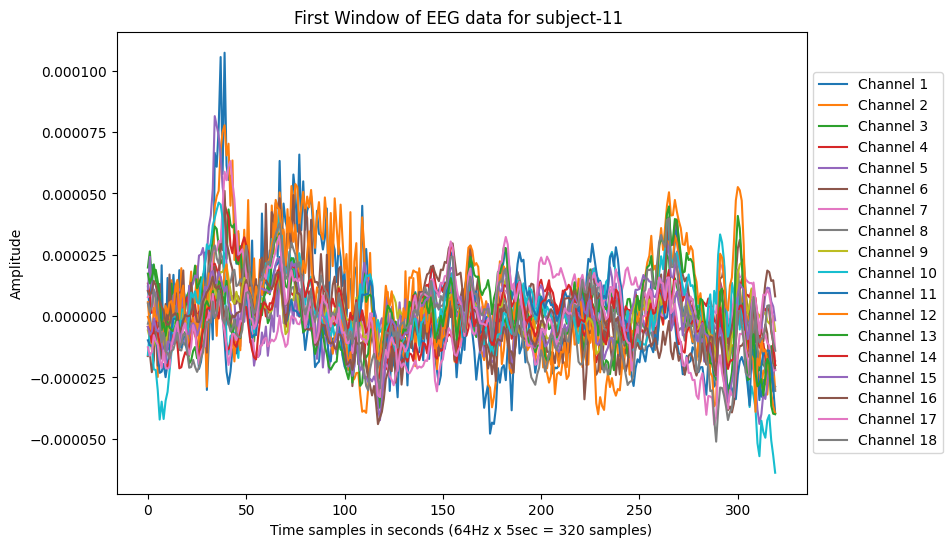

In [23]:
#Visualization step of 5 second duration.

import matplotlib.pyplot as plt

# Plot the first window of data for all channels
window_data = data[1, :, :]
plt.figure(figsize=(12, 6))

# Adjust the subplot parameters to make space for the legend
plt.subplots_adjust(right=0.7)

for i in range(window_data.shape[0]):
    plt.plot(window_data[i, :], label=f'Channel {i+1}')

plt.xlabel('Time samples in seconds (64Hz x 5sec = 320 samples)')
plt.ylabel('Amplitude')
plt.title('First Window of EEG data for subject-11 ')

# Place the legend outside the plot
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

plt.show()


In [24]:
import pandas as pd
import numpy as np

# Read the CSV file
df_seizures = pd.read_csv('/content/eeg/seizure_labels.csv')

# Comprehensive NaN ranges for all subjects
nan_ranges = {
    1: (6994, 15416),
    2: (3762, 15416),
    3: (4413, 15416),
    4: (3426, 15416),
    5: (3842, 15416),
    6: (4704, 15416),
    7: (3655, 15416),
    8: (4614, 15416),
    9: (3551, 15416),
    10: (5428, 15416),
    11: (7489, 15416),
    12: (4469, 15416),
    13: (0, 0),  # No NaN values
    14: (3727, 15416),
    15: (6899, 15416),
    16: (5942, 15416),
    17: (5494, 15416),
    18: (3652, 15416),
    19: (9007, 15416),
    20: (3988, 15416),
    21: (5708, 15416),
    22: (3845, 15416),
    23: (4434, 15416),
    24: (3707, 15416),
    25: (6710, 15416),
    26: (4183, 15416),
    27: (3497, 15416),
    28: (5758, 15416),
    29: (8038, 15416),
    30: (3938, 15416),
    31: (3530, 15416),
    32: (4614, 15416),
    33: (3748, 15416),
    34: (6492, 15416),
    35: (3768, 15416),
    36: (5083, 15416),
    37: (4579, 15416),
    38: (6096, 15416),
    39: (4630, 15416),
    40: (5838, 15416),
    41: (9685, 15416),
    42: (4975, 15416),
    43: (7284, 15416),
    44: (3361, 15416),
    45: (3823, 15416),
    46: (5121, 15416),
    47: (3607, 15416),
    48: (3841, 15416),
    49: (8644, 15416),
    50: (9851, 15416),
    51: (4702, 15416),
    52: (3921, 15416),
    53: (3471, 15416),
    54: (4345, 15416),
    55: (5162, 15416),
    56: (3832, 15416),
    57: (3134, 15416),
    58: (4686, 15416),
    59: (3924, 15416),
    60: (3780, 15416),
    61: (5830, 15416),
    62: (5853, 15416),
    63: (3901, 15416),
    64: (6338, 15416),
    65: (4801, 15416),
    66: (11351, 15416),
    67: (4901, 15416),
    68: (3616, 15416),
    69: (3974, 15416),
    70: (4907, 15416),
    71: (4277, 15416),
    72: (4999, 15416),
    73: (3731, 15416),
    74: (4365, 15416),
    75: (3956, 15416),
    76: (3822, 15416),
    77: (4194, 15416),
    78: (4972, 15416),
    79: (3298, 15416)
}

print(f"Initial shape of DataFrame: {df_seizures.shape}")

# Create a set to track indices of rows to exclude
rows_to_exclude = set()

# Iterate through each subject and gather rows to exclude based on specified ranges
for subject_id, (start_row, end_row) in nan_ranges.items():
    if start_row < end_row:  # Only consider valid ranges
        rows_to_exclude.update(range(start_row, end_row))

# Create a boolean mask for rows to keep
mask = ~df_seizures.index.isin(rows_to_exclude)

# Filter the DataFrame using the mask
df_filtered = df_seizures[mask]

# Reset index after filtering rows
df_filtered.reset_index(drop=True, inplace=True)

# Print final shape of filtered DataFrame
print(f"Final shape of DataFrame after filtering: {df_filtered.shape}")

# Display counts for each column in the filtered DataFrame
for col in df_filtered.columns:
    print(f"Remaining entries in column '{col}': {df_filtered[col].count()}")


df_filtered['2'].count()

Initial shape of DataFrame: (15416, 79)
Final shape of DataFrame after filtering: (3134, 79)
Remaining entries in column '1': 3134
Remaining entries in column '2': 3134
Remaining entries in column '3': 3134
Remaining entries in column '4': 3134
Remaining entries in column '5': 3134
Remaining entries in column '6': 3134
Remaining entries in column '7': 3134
Remaining entries in column '8': 3134
Remaining entries in column '9': 3134
Remaining entries in column '10': 3134
Remaining entries in column '11': 3134
Remaining entries in column '12': 3134
Remaining entries in column '13': 3134
Remaining entries in column '14': 3134
Remaining entries in column '15': 3134
Remaining entries in column '16': 3134
Remaining entries in column '17': 3134
Remaining entries in column '18': 3134
Remaining entries in column '19': 3134
Remaining entries in column '20': 3134
Remaining entries in column '21': 3134
Remaining entries in column '22': 3134
Remaining entries in column '23': 3134
Remaining entries i

3134



* After running sub step-02 we can observe how  5 labels are Segregated together in temporal order of occurence's to form  one final window label later in down cells.




In [26]:
#sub step-2

import pandas as pd

# Load the DataFrame
df_seizures = pd.read_csv('/content/eeg/seizure_labels.csv')

# Print initial shape of DataFrame
print(f"Initial shape of DataFrame: {df_seizures.shape}")

# Define a dictionary with varying starting indexes for each column
row_counts = {
    '1': 6993,
    '2': 3761,
    '3': 4412,    # Retain first 15 rows for column '3'
    '4': 3425,    # Retain first 15 rows for column '4'
    '5': 3841,    # Retain first 15 rows for column '5'
    '6': 4703,    # Retain first 15 rows for column '6'
    '7': 3654,    # Retain first 15 rows for column '7
    '8': 4613,    # Retain first 15 rows for column '8'
    '9': 3550,    # Retain first 15 rows for column '9
    '10': 5427,   # Retain first 15 rows for column '10'
    '11': 7488,   # Retain first 15 rows for column '11'
    '12': 4468,   # Retain first 15 rows for column '12'
    '13': 15416,      # Retain first 0 rows for column '13
    '14': 3726,  # Retain first 15 rows for column '14'
    '15': 6898,   # Retain first 15 rows for column '15'
    '16': 5941,  # Retain first 15 rows for column '16'
    '17': 5493,   # Retain first 15 rows for column '17
    '18': 3651,  # Retain first 15 rows for column '18'
    '19': 9006,   # Retain first 15 rows for column '19'
    '20': 3987,  # Retain first 15 rows for column '20'
    '21': 5707,   # Retain first 15 rows for column '21'
    '22': 3844,  # Retain first 15 rows for column '22'
    '23': 4433,  # Retain first 15 rows for column '23'
    '24': 3706,  # Retain first 15 rows for column '24'
    '25': 6709,   # Retain first 15 rows for column '25'
    '26': 4182,  # Retain first 15 rows for column '26'
    '27': 3496,  # Retain first 15 rows for column '27
    '28': 5757,  # Retain first 15 rows for column '28'
    '29': 8037,   # Retain first 15 rows for column '29
    '30': 3937,  # Retain first 15 rows for column '30'
    '31': 3529,  # Retain first 15 rows for column '31
    '32': 4613,  # Retain first 15 rows for column '32'
    '33': 3747,  # Retain first 15 rows for column '33'
    '34': 6491,  # Retain first 15 rows for column '34'
    '35': 3767,  # Retain first 15 rows for column '35'
    '36': 5082,  # Retain first 15 rows for column '36'
    '37': 4578,  # Retain first 15 rows for column '37
    '38': 6095,  # Retain first 15 rows for column '38'
    '39': 4629,  # Retain first 15 rows for column '39
    '40': 5837,  # Retain first 15 rows for column '40'
    '41': 9684,  # Retain first 15 rows for column '41'
    '42': 4974,  # Retain first 15 rows for column '42'
    '43': 7283,  # Retain first 15 rows for column '43
    '44': 3360,  # Retain first 15 rows for column '44
    '45': 3822,  # Retain first 15 rows for column '45'
    '46': 5120,  # Retain first 15 rows for column '46
    '47': 3606,  # Retain first 15 rows for column '47'
    '48': 3840,  # Retain first 15 rows for column '48
    '49': 8643,  # Retain first 15 rows for column '49'
    '50'  : 9850,  # Retain first 15 rows for column '50'
    '51': 4701,  # Retain first 15 rows for column '51'
    '52': 3920,  # Retain first 15 rows for column '52
    '53': 3470,  # Retain first 15 rows for column '53'
    '54': 4344,  # Retain first 15 rows for column '54
    '55': 5161,  # Retain first 15 rows for column '55'
    '56': 3831,  # Retain first 15 rows for column '56
    '57': 3133,  # Retain first 15 rows for column '57'
    '58': 4685,  # Retain first 15 rows for column '58'
    '59': 3923,  # Retain first 15 rows for column '59'
    '60': 3779,  # Retain first 15 rows for column '60
    '61': 5829,  # Retain first 15 rows for column '61'
    '62': 5852,  # Retain first 15 rows for column '62'
    '63': 3900,  # Retain first 15 rows for column '63'
    '64': 6337,  # Retain first 15 rows for column '64
    '65': 4800,  # Retain first 15 rows for column '65'
    '66': 11350,  # Retain first 15 rows for column '66'
    '67': 4899,  # Retain first 15 rows for column '67
    '68': 3615,  # Retain first 15 rows for column '68'
    '69': 3973,  # Retain first 15 rows for column '69'
    '70': 4906,  # Retain first 15 rows for column '70'
    '71': 4276,  # Retain first 15 rows for column '71
    '72': 4998,  # Retain first 15 rows for column '72'
    '73': 3730,  # Retain first 15 rows for column '73
    '74': 4364,  # Retain first 15 rows for column '74'
    '75': 3955,  # Retain first 15 rows for column '75
    '76': 3821,  # Retain first 15 rows for column '76'
    '77': 4193,  # Retain first 15 rows for column '77'
    '78': 4971,  # Retain first 15 rows for column '78'
    '79': 3297,  # Retain first 15 rows for column '79'

}


# Create a dictionary to store selected labels
selected_labels = {}

# Iterate through each specified column and select the desired number of rows
for col, count in row_counts.items():
    if col in df_seizures.columns:
        # Select up to count from the current column
        selected_values = df_seizures[col].head(count).tolist()  # Convert to list
        selected_labels[col] = selected_values  # Store in dictionary

# Print the resulting dictionary of selected labels
print("Selected Labels:")
for key, value in selected_labels.items():
    print(f"{key}: {value}")

# Example of grouping labels based on a condition
# Here we group every 5 labels together as an example
grouped_labels = {}
group_size = 5

for key, values in selected_labels.items():
    grouped_labels[key] = [values[i:i + group_size] for i in range(0, len(values), group_size)]

# Print grouped labels
print("\nGrouped Labels:")
for key, groups in grouped_labels.items():
    print(f"{key}: {groups}")




# Create a new dictionary to store transformed labels
transformed_labels = {}

# Iterate through each key in grouped_labels
for key, groups in grouped_labels.items():
    transformed_groups = []
    for group in groups:
        # Convert values: replace 0.0 with 0 and 1.0 with 1
        transformed_group = [int(value) for value in group]  # Convert float to int
        transformed_groups.append(transformed_group)
    transformed_labels[key] = transformed_groups

# Print the transformed labels
print("---"*100)
print("Transformed Labels:")
for key, value in transformed_labels.items():
    print(f"{key}: {value}")

len(grouped_labels['1'])


# Create a new dictionary to store final grouped values
final_grouped_labels = {}

# Iterate through each key in transformed_labels
for key, groups in transformed_labels.items():
    final_values = []
    for group in groups:
        # Check if any value in the group is 1
        if any(value == 1 for value in group):
            final_values.append(1)  # Set to 1 if any value is 1
        else:
            final_values.append(0)  # Set to 0 if no values are 1
    final_grouped_labels[key] = final_values

# Print the final grouped labels
print("Final Grouped Labels:")
for key, value in final_grouped_labels.items():
    print(f"{key}: {value}")


Initial shape of DataFrame: (15416, 79)
Selected Labels:
1: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0,

\
*   **Subjects who are seizure-free & corrupted to load with mne are removed:**: 1,6, 10, 12, 18, 24, 25 , 26,27, 28, 29, 30, 32, 35, 37, 42, 43, 45, 46, 48, 49, 53, 55, 56, 57, 58, 59, 60, 61, 62 64, 65, 70, 72, 74"
*   we would be finally  left with **exactly "44" ** Subjects/neonates for feature extraction process at later stages




In [28]:
# Sub step -03

#pre-processing labellings - 2

import pandas as pd
import copy



'''
# # Print subjects who are seizure-free
# print("Subjects who are seizure-free: 6, 10, 12, 18, 24, 26, 27, 28, 29, 30, 32, 35, 37, 42, 43, 45, 46, 48, 49, 53, 55, 56, 57, 58, 59, 60, 61, 64, 65, 70, 72, 74")
# print("From original 79 subjects, after removing corrupted files and seizure-free subjects leading to finally processing labels.")
# print("Reason for dropping 1, 25, 62 are EDF files corrupted, not loading with MNE Library.")
'''


# Create a new dictionary to store windowed labels
windowed_labels = {}

# Iterate through each key in final_grouped_labels
for key, values in final_grouped_labels.items():
    windowed_labels[key] = {}
    for index, value in enumerate(values):
        # Assign a window label (e.g., w1, w2, ...)
        window_label = f"w{index + 1}"  # w1 for first group, w2 for second, etc.
        windowed_labels[key][window_label] = value

# Print the resulting windowed labels
print("Windowed Labels:")
for key, value in windowed_labels.items():
    print(f"{key}: {value}")


# List of subjects to drop
subjects_to_drop = {1, 62, 25, 6, 10, 12, 18, 24, 26, 27,
                     28, 29, 30, 32, 35, 37, 42,
                     43, 45, 46, 48, 49, 53,
                     55, 56, 57, 58, 59,
                     60, 61, 64, 65,
                     70, 72, 74}

# Create a new dictionary to store final windowed labels without dropped subjects
final_windowed_labels_subjects = {}

# Iterate through each key in windowed_labels
for key, value in windowed_labels.items():
    # Extract the subject ID from the key (assuming key is in format 'eegX.edf')
    subject_id = int(key.split('.')[0].split('eeg')[-1])

    # Check if the subject ID is not in the drop list
    if subject_id not in subjects_to_drop:
        final_windowed_labels_subjects[key] = value

# Print the final windowed labels for subjects
print("---"*100)
print("Final Windowed Labels Subjects:")
for key, value in final_windowed_labels_subjects.items():
    print(f"{key}: {value}")


Windowed Labels:
1: {'w1': 0, 'w2': 0, 'w3': 0, 'w4': 0, 'w5': 0, 'w6': 0, 'w7': 0, 'w8': 0, 'w9': 0, 'w10': 0, 'w11': 0, 'w12': 0, 'w13': 0, 'w14': 0, 'w15': 0, 'w16': 0, 'w17': 0, 'w18': 0, 'w19': 0, 'w20': 0, 'w21': 1, 'w22': 1, 'w23': 1, 'w24': 1, 'w25': 1, 'w26': 0, 'w27': 0, 'w28': 0, 'w29': 0, 'w30': 0, 'w31': 0, 'w32': 0, 'w33': 0, 'w34': 0, 'w35': 0, 'w36': 0, 'w37': 0, 'w38': 0, 'w39': 0, 'w40': 0, 'w41': 0, 'w42': 0, 'w43': 0, 'w44': 0, 'w45': 0, 'w46': 0, 'w47': 0, 'w48': 0, 'w49': 0, 'w50': 0, 'w51': 0, 'w52': 0, 'w53': 0, 'w54': 0, 'w55': 0, 'w56': 0, 'w57': 0, 'w58': 0, 'w59': 0, 'w60': 0, 'w61': 0, 'w62': 0, 'w63': 0, 'w64': 1, 'w65': 1, 'w66': 1, 'w67': 1, 'w68': 1, 'w69': 1, 'w70': 1, 'w71': 1, 'w72': 1, 'w73': 1, 'w74': 1, 'w75': 1, 'w76': 1, 'w77': 1, 'w78': 1, 'w79': 1, 'w80': 1, 'w81': 1, 'w82': 1, 'w83': 1, 'w84': 1, 'w85': 1, 'w86': 1, 'w87': 1, 'w88': 1, 'w89': 1, 'w90': 1, 'w91': 1, 'w92': 0, 'w93': 0, 'w94': 0, 'w95': 0, 'w96': 0, 'w97': 0, 'w98': 0, 'w99': 0

In [34]:
#saving finalized_labels in json  format for faster loadups, for  later uses

import json

json_path = '/content/eeg/finalized_windowed_labels.json'
with open(json_path, 'w') as json_file:
    json.dump(final_windowed_labels_subjects, json_file)

print(f"Data saved to {json_path}")

Data saved to /content/eeg/finalized_windowed_labels.json


In [35]:
#saving finalized_labels in pickle format for faster loadups, for  later uses

import pickle

# Save to a Pickle file
pickle_path = '/content/eeg/finalized_windowed_labels.pkl'
with open(pickle_path, 'wb') as pickle_file:
    pickle.dump(final_windowed_labels_subjects, pickle_file)

print(f"Data saved to {pickle_path}")

Data saved to /content/eeg/finalized_windowed_labels.pkl


In [29]:
#Clinical Information as mentioned in the  clinical_information.csv

import pandas as pd
cimical_information_dataframe  = pd.read_csv('/content/eeg/clinical_information.csv')
cimical_information_dataframe.head()

ID EEG file Gender           BW (g) GA (weeks) EEG to PMA (weeks)  \
0   1     eeg1      f  less than 2500g   37 to 38           37 to 38   
1   2     eeg2      m  less than 2500g   35 to 36           37 to 38   
2   3     eeg3      m              NaN   40 to 41           41 to 42   
3   4     eeg4      m    3000 to 3500g   39 to 40           39 to 40   
4   5     eeg5      f    2500 to 3000g   39 to 40           39 to 40   

                                          Diagnosis  \
0                            mild/moderate asphyxia   
1                                       prematurity   
2                                               NaN   
3                            mild/moderate asphyxia   
4  asphyxia (undefined grade); neonatal convulsions   

                               Neuroimaging Findings PNA of Imaging (days)  \
0                        widespread ischemic changes                0 to 4   
1                                  ultrasound normal                0 to 4   
2                                                NaN                   NaN   
3                bilateral watershed area infarction                4 to 7   
4  haemorrhage in left lateral ventricle; subarac...                0 to 4   

   Number of Reviewers Annotating Seizure           Primary Localisation Other  
0                                       3  both hemispheres; alternating   NaN  
1                                       1                            NaN   NaN  
2                                       0                            NaN   NaN  
3                                       3          right centro-parietal   NaN  
4                                       3                left hemisphere   NaN

## Feature Extraction Process

---
*  Using PLV (Phase locking value between each channels 1-18 , meaning each window of 5 sec duration has 320 samples(64 Hz x 5 sec)  and 18 x 18 matrix of PLV.

* PLV is tracked in Bet band : [12-30 Hz] as per literature

* Studies have shown that abnormal changes in beta power or connectivity may occur before the onset of seizures (pre-ictal state).

*   Later 2 window pairs are used as features with  labels from next window.

* for example [W1,w2] features  mapped to --> label of W3 and so on.

* These windows might be varying , depending on eeg recording among subjects.

* We aim to do subjct specific forecast here, not all combined

---
**Note** : Please wait, as  computation might take some time to complete.




In [36]:
import os
import numpy as np
import pickle
from scipy.signal import hilbert, butter, filtfilt


# Function to compute phase-locking value (PLV)
def compute_plv(signal1, signal2):
    phase1 = np.angle(hilbert(signal1))
    phase2 = np.angle(hilbert(signal2))
    phase_diff = phase1 - phase2
    plv = np.abs(np.mean(np.exp(1j * phase_diff)))
    return plv

# Function to compute PLV matrices
def compute_plv_matrices(subject_files, final_windowed_labels, save_dir="./plv_features"):
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Load labels
    with open(final_windowed_labels, 'rb') as f:
        final_windowed_labels = pickle.load(f)

    # Iterate over each subject file
    for file_path in subject_files:
        # Load the segmented window data
        data = np.load(file_path)

        # Extract subject_id from the filename
        subject_id = os.path.basename(file_path).replace('eeg', '').replace('.edf_segmented.npy', '')

        # Check if the subject exists in the final_windowed_labels dictionary
        if subject_id not in final_windowed_labels:
            print(f"Skipping subject {subject_id} as it's not found in labels.")
            continue

        # Get the subject-specific labels
        subject_labels = final_windowed_labels[subject_id]

        # Create a directory to save the feature matrices for each subject
        subject_save_dir = os.path.join(save_dir, f'subject_{subject_id}')
        if not os.path.exists(subject_save_dir):
            os.makedirs(subject_save_dir)

        # Process each window
        for i, window_data in enumerate(data):
            # PLV matrix computation
            plv_matrix = np.zeros((18, 18))

            for ch1 in range(18):
                for ch2 in range(ch1, 18):
                    # Compute PLV between channel pairs
                    if ch1 == ch2:
                        plv_matrix[ch1, ch2] = 1  # PLV is 1 for the same channel
                    else:
                        plv_matrix[ch1, ch2] = compute_plv(window_data[ch1], window_data[ch2])
                        plv_matrix[ch2, ch1] = plv_matrix[ch1, ch2]  # Symmetric

            # Store the PLV matrix with label
            feature_filename = os.path.join(subject_save_dir, f'w{i + 1}_label_{subject_labels[f"w{i + 1}"]}.npy')
            np.save(feature_filename, {
                'plv_matrix': plv_matrix,
                'label': subject_labels[f"w{i + 1}"]
            })

    print("PLV matrices saved for all subjects.")

# Example usage:
subject_files = [
    '/content/eeg2.edf_segmented.npy','/content/eeg3.edf_segmented.npy','/content/eeg4.edf_segmented.npy','/content/eeg5.edf_segmented.npy','/content/eeg7.edf_segmented.npy',
    '/content/eeg8.edf_segmented.npy','/content/eeg9.edf_segmented.npy','/content/eeg11.edf_segmented.npy','/content/eeg13.edf_segmented.npy','/content/eeg14.edf_segmented.npy',
    '/content/eeg15.edf_segmented.npy','/content/eeg16.edf_segmented.npy','/content/eeg17.edf_segmented.npy','/content/eeg19.edf_segmented.npy','/content/eeg20.edf_segmented.npy',
    '/content/eeg21.edf_segmented.npy','/content/eeg22.edf_segmented.npy','/content/eeg23.edf_segmented.npy', '/content/eeg31.edf_segmented.npy',
    '/content/eeg33.edf_segmented.npy','/content/eeg34.edf_segmented.npy','/content/eeg36.edf_segmented.npy','/content/eeg38.edf_segmented.npy', '/content/eeg39.edf_segmented.npy',
    '/content/eeg40.edf_segmented.npy','/content/eeg41.edf_segmented.npy','/content/eeg44.edf_segmented.npy','/content/eeg47.edf_segmented.npy','/content/eeg50.edf_segmented.npy',
    '/content/eeg51.edf_segmented.npy', '/content/eeg52.edf_segmented.npy','/content/eeg54.edf_segmented.npy', '/content/eeg63.edf_segmented.npy',
    '/content/eeg66.edf_segmented.npy','/content/eeg67.edf_segmented.npy','/content/eeg68.edf_segmented.npy','/content/eeg69.edf_segmented.npy','/content/eeg71.edf_segmented.npy',
    '/content/eeg73.edf_segmented.npy','/content/eeg75.edf_segmented.npy','/content/eeg76.edf_segmented.npy','/content/eeg77.edf_segmented.npy','/content/eeg78.edf_segmented.npy','/content/eeg79.edf_segmented.npy'
]

final_windowed_labels_file = '/content/eeg/finalized_windowed_labels.pkl'

compute_plv_matrices(subject_files, final_windowed_labels_file, save_dir="./plv_features")


PLV matrices saved for all subjects.


In [38]:
import os
import numpy as np

def process_all_subjects(beta_features_dir, save_dir="./processed_subjects"):
    """
    Automatically processes all subject directories in the given beta_features directory.

    Args:
        beta_features_dir (str): Path to the directory containing subject subdirectories.
        save_dir (str): Directory to save the processed files.

    Returns:
        None
    """
    if not os.path.exists(save_dir):
        os.makedirs(save_dir)

    # Automatically find all subject directories in the beta_features directory
    subject_dirs = [
        os.path.join(plv_features_dir, d) for d in os.listdir(beta_features_dir)
        if os.path.isdir(os.path.join(plv_features_dir, d))
    ]

    for subject_dir in subject_dirs:
        subject_id = os.path.basename(subject_dir)
        print(f"Processing subject: {subject_id}")

        # List all files in the subject directory
        files = [f for f in os.listdir(subject_dir) if f.endswith('.npy')]

        # Extract window numbers and sort files
        sorted_files = sorted(files, key=lambda x: int(x.split('_')[0][1:]))  # Extract window number (e.g., w1000 -> 1000)

        # Initialize list to store processed data
        ordered_plvs = []
        ordered_labels = []

        for file in sorted_files:
            file_path = os.path.join(subject_dir, file)

            # Load the file and extract PLV and label
            data = np.load(file_path, allow_pickle=True).item()
            plv_matrix = data['plv_matrix']
            label = data['label']

            ordered_plvs.append(plv_matrix)
            ordered_labels.append(label)

        # Save the ordered PLVs and labels
        subject_save_path = os.path.join(save_dir, f"{subject_id}_processed.npz")
        np.savez(subject_save_path, plvs=ordered_plvs, labels=ordered_labels)
        print(f"Processed data saved for subject: {subject_id} -> {subject_save_path}")

    print("Processing completed for all subjects.")


plv_features_dir = "/content/plv_features"  # Path to the main directory containing subject subdirectories
process_all_subjects(plv_features_dir, save_dir="./processed_subjects")


Processing subject: subject_36
Processed data saved for subject: subject_36 -> ./processed_subjects/subject_36_processed.npz
Processing subject: subject_47
Processed data saved for subject: subject_47 -> ./processed_subjects/subject_47_processed.npz
Processing subject: subject_79
Processed data saved for subject: subject_79 -> ./processed_subjects/subject_79_processed.npz
Processing subject: subject_15
Processed data saved for subject: subject_15 -> ./processed_subjects/subject_15_processed.npz
Processing subject: subject_22
Processed data saved for subject: subject_22 -> ./processed_subjects/subject_22_processed.npz
Processing subject: subject_38
Processed data saved for subject: subject_38 -> ./processed_subjects/subject_38_processed.npz
Processing subject: subject_63
Processed data saved for subject: subject_63 -> ./processed_subjects/subject_63_processed.npz
Processing subject: subject_69
Processed data saved for subject: subject_69 -> ./processed_subjects/subject_69_processed.npz


In [40]:
def prepare_tcn_data_with_order(subject_file, timesteps=2, train_split=0.8):
    """
    Prepares ordered TCN-ready data for training and testing.

    Args:
        subject_file (str): Path to the processed subject file (.npz).
        timesteps (int): Number of consecutive windows to use as input.
        train_split (float): Proportion of data to use for training.

    Returns:
        (X_train, y_train), (X_test, y_test): Ordered training and test data splits.
    """
    # Load subject data
    data = np.load(subject_file, allow_pickle=True)
    plvs = data['plvs']  # List of PLV matrices (shape 18x18)
    labels = data['labels']  # List of corresponding labels (0 or 1)

    # Flatten PLV matrices
    flattened_plvs = [plv.flatten() for plv in plvs]  # Each PLV becomes a 1D vector of size 324

    # Create sliding window inputs and labels
    X, y = [], []
    for i in range(len(flattened_plvs) - timesteps):
        # Take `timesteps` consecutive windows as input
        X.append(flattened_plvs[i:i+timesteps])
        # Assign the label of the next window
        y.append(labels[i + timesteps])

    # Convert to numpy arrays
    X = np.array(X)  # Shape: (num_samples, timesteps, num_features)
    y = np.array(y)  # Shape: (num_samples,)

    # Ensure train-test split respects window order
    split_idx = int(len(X) * train_split)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    return (X_train, y_train), (X_test, y_test)

# Example usage
subject_file = "/content/processed_subjects/subject_11_processed.npz"
(X_train, y_train), (X_test, y_test) = prepare_tcn_data_with_order(subject_file, timesteps=2, train_split=0.8)

print("Training Data Shape:", X_train.shape, y_train.shape)
print("Testing Data Shape:", X_test.shape, y_test.shape)



Training Data Shape: (1196, 2, 324) (1196,)
Testing Data Shape: (299, 2, 324) (299,)


In [53]:
# Print the first few training samples and labels to confirm order which has PLV matrices of 18x18

print("First 5 training samples (X_train):")
for i in range(5):
    print(f"Sample {i}: {X_train[i]}")  # Print the raw values
print("First 5 training labels (y_train):", y_train[:5])

# Print the first few testing samples and labels to confirm order
print("First 5 testing samples (X_test):")
for i in range(5):
    print(f"Sample {i}: {X_test[i]}")
print("First 5 testing labels (y_test):", y_test[:5])


First 5 training samples (X_train):
Sample 0: [[1.         0.61695944 0.57754266 0.44746111 0.48446313 0.46726591
  0.43868315 0.39696412 0.37332448 0.29751552 0.46848002 0.34845132
  0.34169696 0.38378205 0.4281298  0.44889481 0.47097082 0.43147345
  0.61695944 1.         0.51194682 0.51405576 0.41993888 0.68432633
  0.35184086 0.3895422  0.47052983 0.35857766 0.54612414 0.51138964
  0.35954123 0.36519265 0.39868243 0.32352275 0.43011768 0.3735404
  0.57754266 0.51194682 1.         0.30509417 0.5667288  0.32113417
  0.32578436 0.59858062 0.2216654  0.4366165  0.39609968 0.18232835
  0.19881836 0.42210496 0.32358395 0.48523262 0.40609353 0.32382381
  0.44746111 0.51405576 0.30509417 1.         0.22199853 0.67003575
  0.31829544 0.31167863 0.70992183 0.37955961 0.43759861 0.55081896
  0.46425047 0.3729393  0.49366519 0.33418191 0.29987883 0.3123825
  0.48446313 0.41993888 0.5667288  0.22199853 1.         0.30212406
  0.32779443 0.42455304 0.20224094 0.50374172 0.5235158  0.34379167
  0.

In [64]:
subject_file = "/content/processed_subjects/subject_11_processed.npz"
(X_train, y_train), (X_test, y_test) = prepare_tcn_data_with_order(subject_file, timesteps=2, train_split=0.8)

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print("---"*100)

print("X_train 's features are :" , X_train)
print(" ")
print("y_train 's features are :" , y_train)

(1196, 2, 324)
(1196,)
(299, 2, 324)
(299,)
------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------------
X_train 's features are : [[[1.         0.61695944 0.57754266 ... 0.63872656 0.73313474 1.        ]
  [1.         0.77232842 0.54011984 ... 0.58767841 0.73181175 1.        ]]

 [[1.         0.77232842 0.54011984 ... 0.58767841 0.73181175 1.        ]
  [1.         0.78181625 0.76754734 ... 0.81167446 0.83389187 1.        ]]

 [[1.         0.78181625 0.76754734 ... 0.81167446 0.83389187 1.        ]
  [1.         0.7081972  0.57310143 ... 0.71313627 0.82686935 1.        ]]

 ...

 [[1.         0.81598575 0.73378924 ... 0.47701048 0.80924276 1.        ]
  [1.         0.87744861 0.78433481 ... 0.71562858 0.76577646 1.        ]]

 [[1.         0.8774486

In [42]:
import numpy as np

# Function to calculate label distribution
def label_distribution(y, dataset_name):
    unique, counts = np.unique(y, return_counts=True)
    label_dist = dict(zip(unique, counts))
    print(f"{dataset_name} Label Distribution:")
    print(f"Non-Seizures (0): {label_dist.get(0, 0)}")
    print(f"Seizures (1): {label_dist.get(1, 0)}")
    print(f"Total: {len(y)}\n")
    return label_dist

# Check label distribution for training and testing data
train_dist = label_distribution(y_train, "Training")
test_dist = label_distribution(y_test, "Testing")


Training Label Distribution:
Non-Seizures (0): 1191
Seizures (1): 5
Total: 1196

Testing Label Distribution:
Non-Seizures (0): 282
Seizures (1): 17
Total: 299



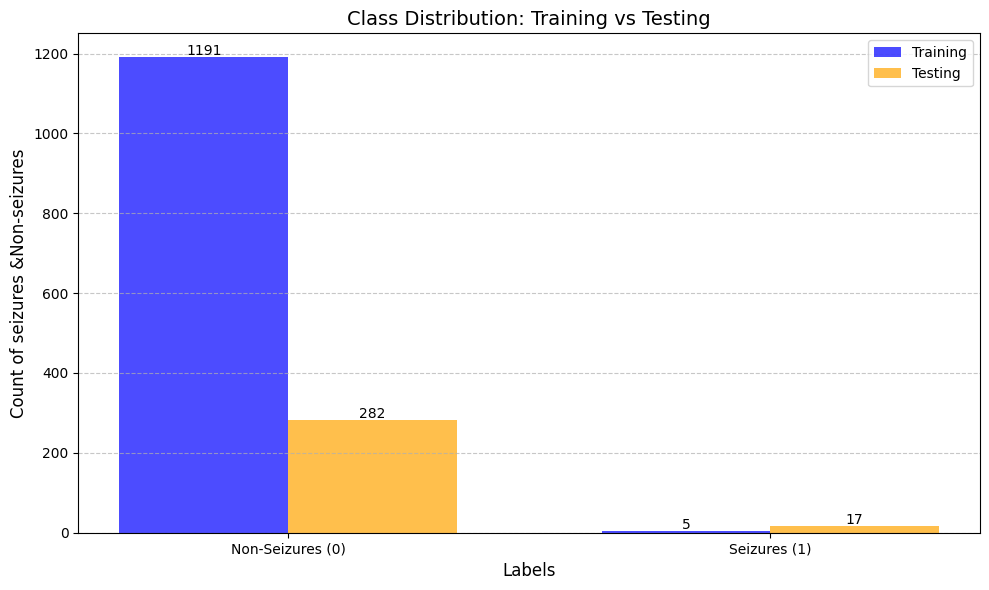

In [43]:
#Visualization of  class Distribution of labels for subject - 11 (as our intial consoderation, we can change to see differnet Distributions as well Here.)

import matplotlib.pyplot as plt
import numpy as np

# Visualization function for label distribution
def plot_label_distribution(train_dist, test_dist):
    """
    Plots the label distribution for training and testing datasets.

    Args:
        train_dist (dict): Distribution of labels in the training dataset.
        test_dist (dict): Distribution of labels in the testing dataset.
    """
    # Labels for classes
    labels = ['Non-Seizures (0)', 'Seizures (1)']

    # Extract values from the distributions
    train_values = [train_dist.get(0, 0), train_dist.get(1, 0)]
    test_values = [test_dist.get(0, 0), test_dist.get(1, 0)]

    # Define bar positions
    x = np.arange(len(labels))
    width = 0.35  # Width of the bars

    # Create the bar chart
    plt.figure(figsize=(10, 6))
    plt.bar(x - width / 2, train_values, width, label='Training', color='blue', alpha=0.7)
    plt.bar(x + width / 2, test_values, width, label='Testing', color='orange', alpha=0.7)

    # Add labels and title
    plt.xlabel('Labels', fontsize=12)
    plt.ylabel('Count of seizures &Non-seizures', fontsize=12)
    plt.title('Class Distribution: Training vs Testing', fontsize=14)
    plt.xticks(x, labels, fontsize=10)
    plt.legend(fontsize=10)
    plt.grid(axis='y', linestyle='--', alpha=0.7)

    # Add value annotations on bars
    for i, v in enumerate(train_values):
        plt.text(x[i] - width / 2, v + 5, str(v), ha='center', fontsize=10)
    for i, v in enumerate(test_values):
        plt.text(x[i] + width / 2, v + 5, str(v), ha='center', fontsize=10)

    # Display the plot
    plt.tight_layout()
    plt.show()

# Visualize the label distribution
plot_label_distribution(train_dist, test_dist)


In [44]:
#Install these two dependencies before Training Model.
!pip install tensorflow scipy

###  Preparation of model paramters,  class imbalnce is solved by assigning weight more to 1: Seizure than 0:Non-Seizure

Class Weights: {0: 0.5020990764063812, 1: 119.6}
Epoch 1/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 20s 60ms/step - accuracy: 0.9047 - loss: 2.2371 - val_accuracy: 0.9431 - val_loss: 0.4430
Epoch 2/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 16ms/step - accuracy: 0.9386 - loss: 0.7754 - val_accuracy: 0.9164 - val_loss: 0.6069
Epoch 3/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 22ms/step - accuracy: 0.7194 - loss: 0.4863 - val_accuracy: 0.9431 - val_loss: 0.3684
Epoch 4/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 37ms/step - accuracy: 0.8544 - loss: 0.8751 - val_accuracy: 0.9431 - val_loss: 0.3707
Epoch 5/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 3s 37ms/step - accuracy: 0.8717 - loss: 0.2385 - val_accuracy: 0.9398 - val_loss: 0.3292
Epoch 6/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 2s 18ms/step - accuracy: 0.7558 - loss: 0.5993 - val_accuracy: 0.9398 - val_loss: 0.2768
Epoch 7/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9403 - loss: 0.1398 - val_accuracy: 0.3144 - val_loss: 1.0178
Epoch 8/20
38/38 ━━━━━━━━━━━━━━━━━━━━ 1s 17ms/step - accuracy

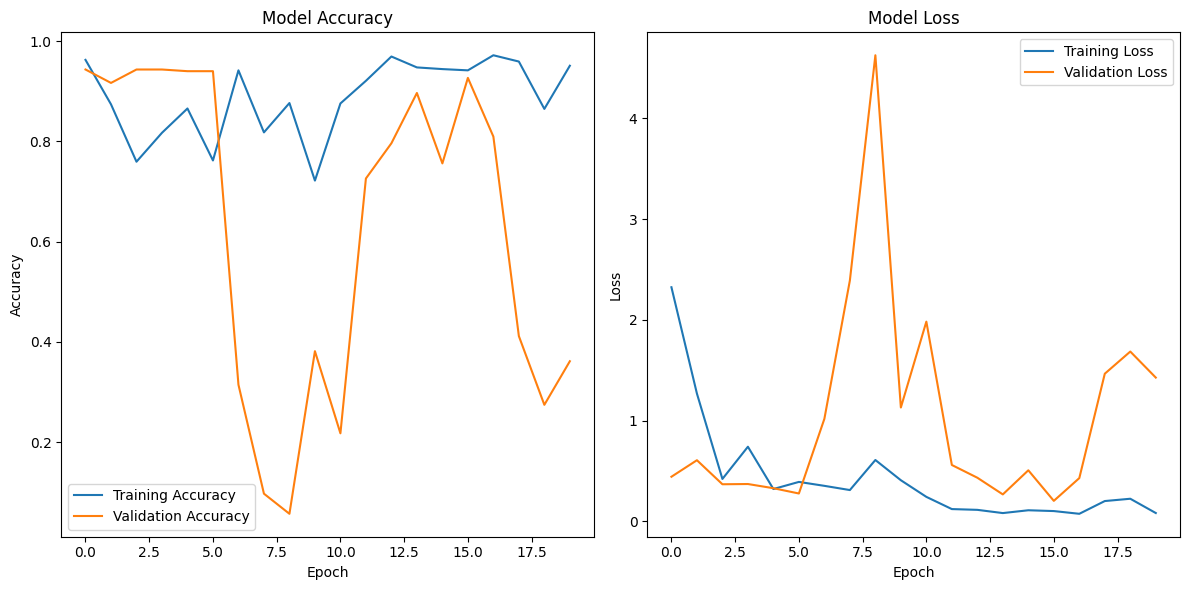

In [45]:
#Dealing with class Imbalance issue Here   --stop check here

import numpy as np
from sklearn.utils.class_weight import compute_class_weight
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv1D, Dense, Flatten, Dropout, BatchNormalization, Input
from sklearn.metrics import classification_report, roc_auc_score
import matplotlib.pyplot as plt


# Step 1: Data Preparation
def prepare_tcn_data_with_order(subject_file, timesteps=2, train_split=0.8):
    """
    Prepares ordered TCN-ready data for training and testing.
    Args:
        subject_file (str): Path to the processed subject file (.npz).
        timesteps (int): Number of consecutive windows to use as input.
        train_split (float): Proportion of data to use for training.
    Returns:
        (X_train, y_train), (X_test, y_test): Ordered training and test data splits.
    """
    # Load subject data
    data = np.load(subject_file, allow_pickle=True)
    plvs = data['plvs']  # List of PLV matrices (shape 18x18)
    labels = data['labels']  # List of corresponding labels (0 or 1)

    # Flatten PLV matrices
    flattened_plvs = [plv.flatten() for plv in plvs]  # Each PLV becomes a 1D vector of size 324

    # Create sliding window inputs and labels
    X, y = [], []
    for i in range(len(flattened_plvs) - timesteps):
        # Take `timesteps` consecutive windows as input
        X.append(flattened_plvs[i:i+timesteps])
        # Assign the label of the next window
        y.append(labels[i + timesteps])

    # Convert to numpy arrays
    X = np.array(X)  # Shape: (num_samples, timesteps, num_features)
    y = np.array(y)  # Shape: (num_samples,)

    # Ensure train-test split respects window order
    split_idx = int(len(X) * train_split)
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]

    return (X_train, y_train), (X_test, y_test)


# Step 2: TCN Model Definition
def build_tcn(input_shape):
    """
    Builds a Temporal Convolutional Network (TCN) model for forecasting seizures.
    Args:
        input_shape (tuple): Shape of the input data (timesteps, num_features).
    Returns:
        model: Compiled TCN model.
    """
    model = Sequential()

    # Input layer
    model.add(Input(shape=input_shape))

    # Temporal Convolutional Layers
    model.add(Conv1D(filters=64, kernel_size=3, dilation_rate=1, activation='relu', padding='causal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))
    model.add(Conv1D(filters=128, kernel_size=3, dilation_rate=2, activation='relu', padding='causal'))
    model.add(BatchNormalization())
    model.add(Dropout(0.3))

    # Fully Connected Layers
    model.add(Flatten())
    model.add(Dense(128, activation='relu'))
    model.add(Dropout(0.3))
    model.add(Dense(1, activation='sigmoid'))  # Binary classification: seizure (1) or non-seizure (0)

    # Compile the model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    return model


# Step 3: Load Data and Compute Class Weights
subject_file = "/content/processed_subjects/subject_11_processed.npz"  # Replace with actual path
(X_train, y_train), (X_test, y_test) = prepare_tcn_data_with_order(subject_file, timesteps=2, train_split=0.8)

# Calculate class weights
class_weights = compute_class_weight(
    class_weight='balanced',
    classes=np.unique(y_train),  # Unique classes in y_train ([0, 1])
    y=y_train                  # Labels in the training dataset
)
class_weights_dict = dict(enumerate(class_weights))
print("Class Weights:", class_weights_dict)

# Step 4: Train the TCN Model with Class Weights
input_shape = (X_train.shape[1], X_train.shape[2])  # (timesteps, num_features)
model = build_tcn(input_shape)

history = model.fit(
    X_train, y_train,
    validation_data=(X_test, y_test),
    epochs=20,
    batch_size=32,
    class_weight=class_weights_dict,  # Apply class weights here
    verbose=1
)

# Step 5: Evaluate the Model
# Predictions
y_pred_prob = model.predict(X_test)  # Predicted probabilities
y_pred = (y_pred_prob > 0.5).astype(int)  # Convert probabilities to binary predictions

# Classification Report
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=["Non-Seizure (0)", "Seizure (1)"]))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC-AUC Score: {roc_auc:.2f}")

# Step 6: Visualize Training Progress
# Accuracy and Loss Plot
plt.figure(figsize=(12, 6))

# Accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.tight_layout()
plt.show()



##Forecast to see 10 seconds ahead what happens whether it leads to seizure ot not in below code.

In [46]:
y_pred = model.predict(X_test)  # Outputs probabilities


# Convert probabilities to binary predictions
y_pred_binary = (y_pred > 0.5).astype(int)

# Display predictions alongside true labels with window sequences
print("Window Sequences | Predicted | Actual")
print("-" * 40)

# Iterate through the test dataset
start_idx = len(X_train)  # Start index for test windows
for i in range(len(X_test)):
    # Get the window indices for this test sample
    window_sequence = [f"w{idx}" for idx in range(start_idx + i + 1, start_idx + i + 1 + X_test.shape[1])]

    # Print the result for this test sample
    print(f"{window_sequence} -> Predicted: {y_pred_binary[i][0]}, Actual: {y_test[i]}")

    # Optionally, stop after displaying 23 windows of forecast form test sample features, Plz cahneg to observe more here.
    if i ==23:
        break



10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Window Sequences | Predicted | Actual
----------------------------------------
['w1197', 'w1198'] -> Predicted: 0, Actual: 0
['w1198', 'w1199'] -> Predicted: 0, Actual: 0
['w1199', 'w1200'] -> Predicted: 1, Actual: 0
['w1200', 'w1201'] -> Predicted: 1, Actual: 0
['w1201', 'w1202'] -> Predicted: 1, Actual: 0
['w1202', 'w1203'] -> Predicted: 1, Actual: 0
['w1203', 'w1204'] -> Predicted: 1, Actual: 0
['w1204', 'w1205'] -> Predicted: 1, Actual: 0
['w1205', 'w1206'] -> Predicted: 1, Actual: 0
['w1206', 'w1207'] -> Predicted: 1, Actual: 0
['w1207', 'w1208'] -> Predicted: 1, Actual: 0
['w1208', 'w1209'] -> Predicted: 1, Actual: 0
['w1209', 'w1210'] -> Predicted: 1, Actual: 0
['w1210', 'w1211'] -> Predicted: 1, Actual: 0
['w1211', 'w1212'] -> Predicted: 0, Actual: 0
['w1212', 'w1213'] -> Predicted: 0, Actual: 0
['w1213', 'w1214'] -> Predicted: 0, Actual: 0
['w1214', 'w1215'] -> Predicted: 1, Actual: 0
['w1215', 'w1216'] -> Predicted: 0, Actual: 0
['w1216

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step 
Classification Report:
              precision    recall  f1-score   support

           0       0.99      0.50      0.67       282
           1       0.10      0.94      0.18        17

    accuracy                           0.53       299
   macro avg       0.55      0.72      0.42       299
weighted avg       0.94      0.53      0.64       299

Confusion Matrix:
[[141 141]
 [  1  16]]


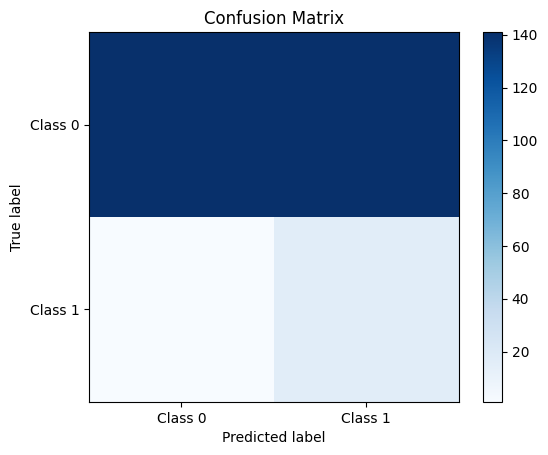

ROC AUC: 0.8158114309553608


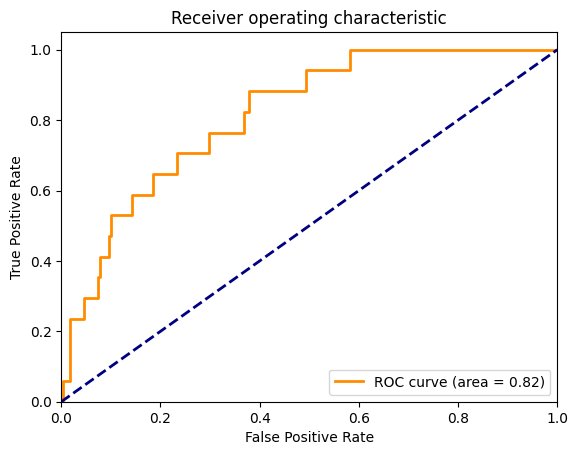

Precision-Recall AUC: 0.20126073730970928


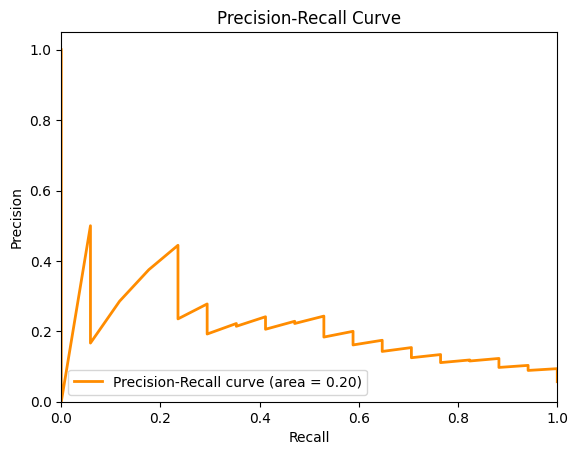

In [47]:
# Detaile dmetrics for Subejct-11's  Seizure Forecast
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc, precision_recall_curve
import matplotlib.pyplot as plt
import numpy as np

# Predictions
y_pred = model.predict(X_test)  # Probabilities
y_pred_binary = (y_pred > 0.7).astype(int)  # Binary predictions (0 or 1)

# Calculate metrics
print("Classification Report:")
print(classification_report(y_test, y_pred_binary))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred_binary)
print("Confusion Matrix:")
print(cm)

# Plotting the Confusion Matrix (optional but useful for visualization)
plt.imshow(cm, interpolation='nearest', cmap='Blues')
plt.title("Confusion Matrix")
plt.colorbar()
tick_marks = np.arange(2)
plt.xticks(tick_marks, ["Class 0", "Class 1"])
plt.yticks(tick_marks, ["Class 0", "Class 1"])
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.show()

# ROC Curve and AUC (optional but useful for evaluating model performance)
fpr, tpr, thresholds = roc_curve(y_test, y_pred)
roc_auc = auc(fpr, tpr)
print("ROC AUC:", roc_auc)

plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.show()

# Precision-Recall Curve (optional but useful for imbalanced datasets)
precision, recall, thresholds = precision_recall_curve(y_test, y_pred)
pr_auc = auc(recall, precision)
print("Precision-Recall AUC:", pr_auc)

plt.plot(recall, precision, color='darkorange', lw=2, label='Precision-Recall curve (area = %0.2f)' % pr_auc)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc="lower left")
plt.show()


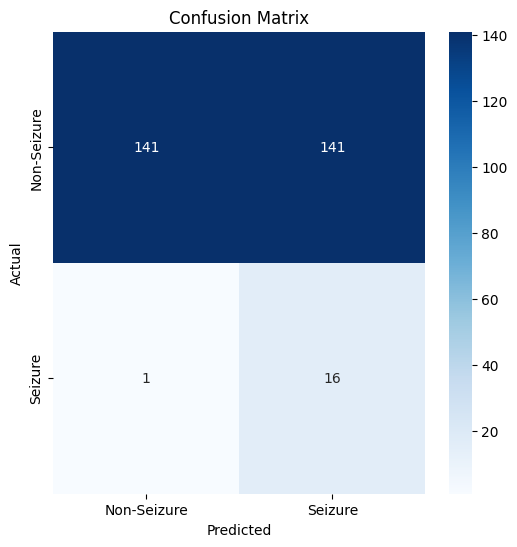

In [48]:
import seaborn as sns

# Confusion Matrix Heatmap
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Non-Seizure', 'Seizure'], yticklabels=['Non-Seizure', 'Seizure'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()
